In [4]:
import pandas as pd
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
import numpy as np
import requests
%matplotlib inline

In [2]:
df = pd.read_csv('data/songs.csv')

/tmp/ipykernel_389/2204026799.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/songs.csv')


In [5]:
# Choose columns that matter the most
key_cols = ['danceability', 'energy', 'key', 'loudness', 'valence', 'tempo', 'genre', 'song_name']
df = df[key_cols]
df = df[df['song_name'].notna()]

In [6]:
# Encode genre to labels
le = LabelEncoder()
df['genre_enc'] = le.fit_transform(df['genre'])
# Form vectors from key columns
df['vecs'] = list(df[['danceability', 'energy', 'key', 'loudness', 'valence', 'tempo', 'genre_enc']].itertuples(index=False, name=None))

In [7]:
# Just use a few important features: too many will lead to very similar clusters
X = np.array(df[['genre_enc', 'valence']].values.tolist())
clu = Birch(n_clusters=6, branching_factor=150, threshold=0.1)
df['clusters'] = clu.fit_predict(X)

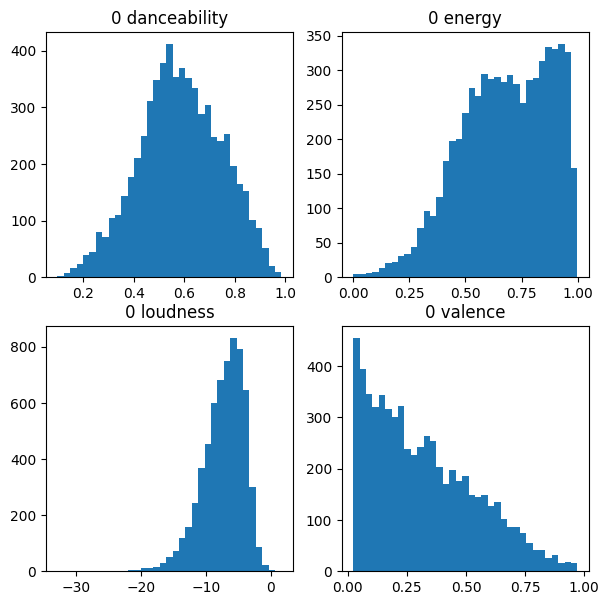

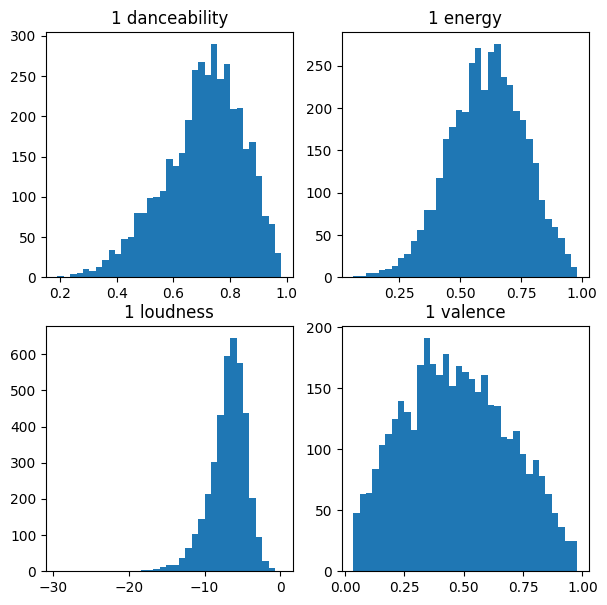

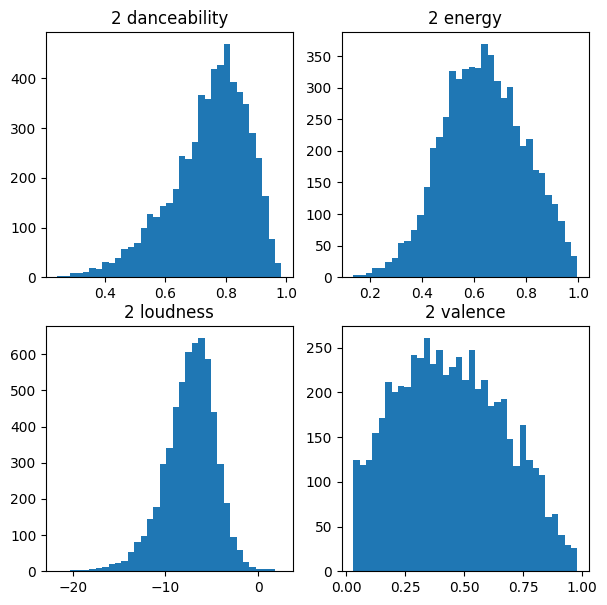

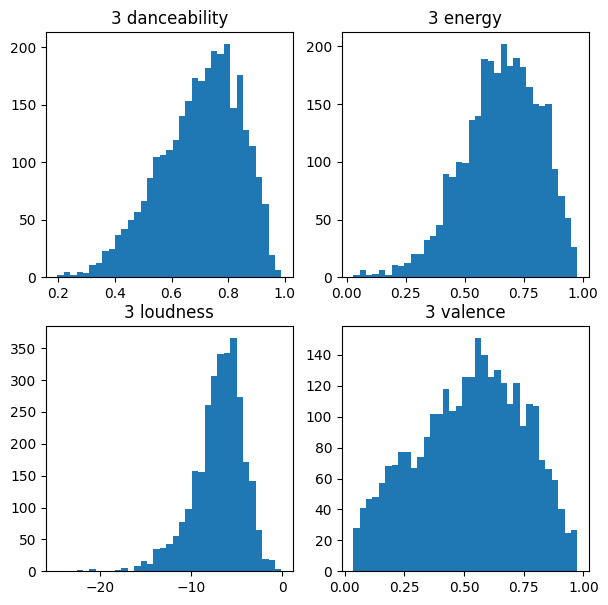

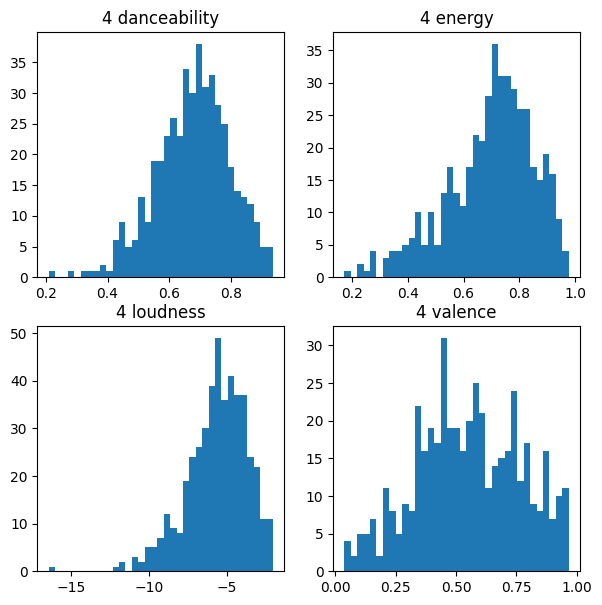

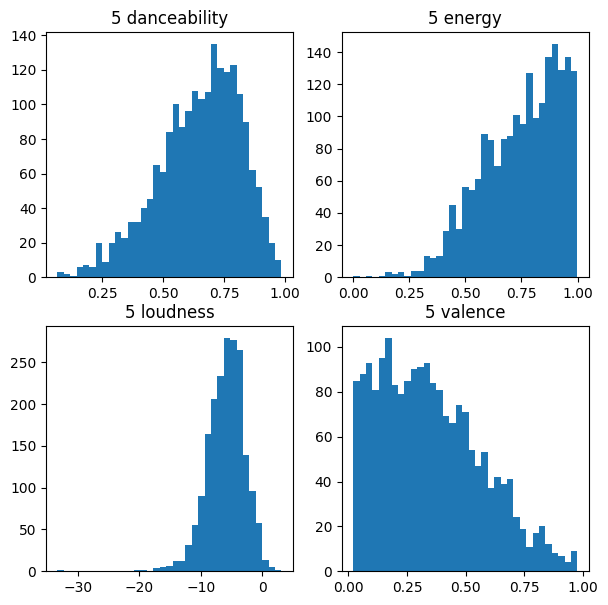

In [8]:
# Plot hists and see distributions
for k in range(6):
    f, ax = plt.subplots(2, 2, figsize=(7, 7))
    sub = df[df['clusters'] == k]
    # print(sub.describe())
    for a, l in zip(ax.ravel(), ['danceability', 'energy', 'loudness', 'valence']):
        a.hist(sub[l], bins=35)
        a.set_title(f"{str(k)} {l}")

In [9]:
# Examine some mean values and choose based on subjective metric which clusters belong where
print('danceability', 'energy', 'loudness', 'valence')
for k in range(6):
    sub = df[df['clusters'] == k]
    print(k, sub[['danceability', 'energy', 'loudness', 'valence']].mean().to_numpy(), sub['genre'].unique())

danceability energy loudness valence
0 [ 0.5852408   0.67754232 -7.30987456  0.31942996] ['Dark Trap' 'Emo']
1 [ 0.70635825  0.6088098  -6.8938984   0.46913441] ['Rap' 'RnB']
2 [ 0.74465804  0.635776   -7.36203574  0.44462934] ['Underground Rap']
3 [ 0.69900761  0.65460771 -7.00906486  0.52380457] ['Hiphop']
4 [ 0.67680694  0.69763774 -5.63207158  0.55026443] ['Pop']
5 [ 0.64756416  0.74915718 -5.87908691  0.3487863 ] ['Trap Metal']


In [11]:
# {"anger": 0, "fear": 1, "joy": 2, "love": 3, "sadness": 4, "surprise": 5}
# make music data and save both key and music information
label2cluster = {5: "anger", 1: "fear", 3: "joy", 4: "love", 0: "sadness", 2: "surprise"}
song_data = {}
for k in range(6):
    sub = df[df['clusters'] == k]
    song_data[label2cluster[k]] = sub['song_name'].to_list()

with open('data/song_data.json', 'w') as f:
    json.dump(song_data, f)